In [7]:
import pandas as pd

car = pd.read_csv("/content/archive (6).zip")
car.head()


,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [8]:
car.info()
car.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


,Year,Selling_Price,Present_Price,Driven_kms,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.642584,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

# Identify categorical columns to encode
categorical_features = ['Car_Name', 'Fuel_Type', 'Selling_type', 'Transmission']

# Apply LabelEncoder to each categorical feature, overwriting the original columns
for col in categorical_features:
    car[col] = le.fit_transform(car[col])

X = car.drop('Selling_Price', axis=1)
y = car['Selling_Price']

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [14]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=250,
    random_state=42
)
model.fit(X_train, y_train)


RandomForestRegressor(n_estimators=250, random_state=42)

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

pred = model.predict(X_test)

print("RMSE:", np.sqrt(mean_squared_error(y_test, pred)))
print("R² Score:", r2_score(y_test, pred))

RMSE: 0.9095814889619804
R² Score: 0.9640843285598611


/tmp/ipython-input-2446897415.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importance, y=features, palette="viridis")
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128664 (\N{ONCOMING AUTOMOBILE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


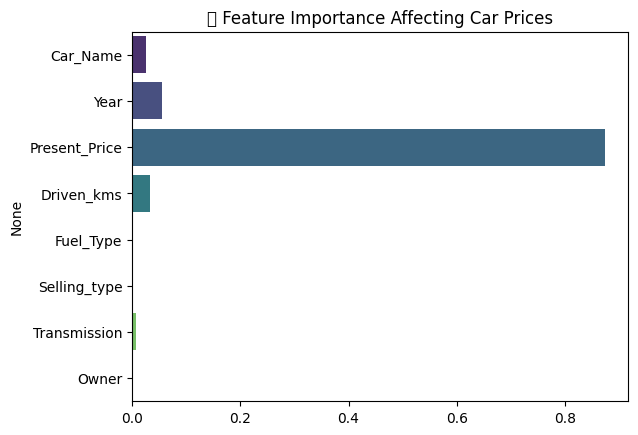

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

importance = model.feature_importances_
features = X.columns

sns.barplot(x=importance, y=features, palette="viridis")
plt.title("🚘 Feature Importance Affecting Car Prices")
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": model
}

results = []

for name, m in models.items():
    m.fit(X_train, y_train)
    preds = m.predict(X_test)
    results.append([
        name,
        np.sqrt(mean_squared_error(y_test, preds)),
        r2_score(y_test, preds),
        mean_absolute_error(y_test, preds)
    ])

results_df = pd.DataFrame(
    results,
    columns=["Model", "RMSE", "R² Score", "MAE"]
)

results_df


,Model,RMSE,R² Score,MAE
0,Linear Regression,1.880697,0.846454,1.214733
1,Decision Tree,1.009589,0.955752,0.626721
2,Random Forest,0.909581,0.964084,0.583119


/tmp/ipython-input-2186118905.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


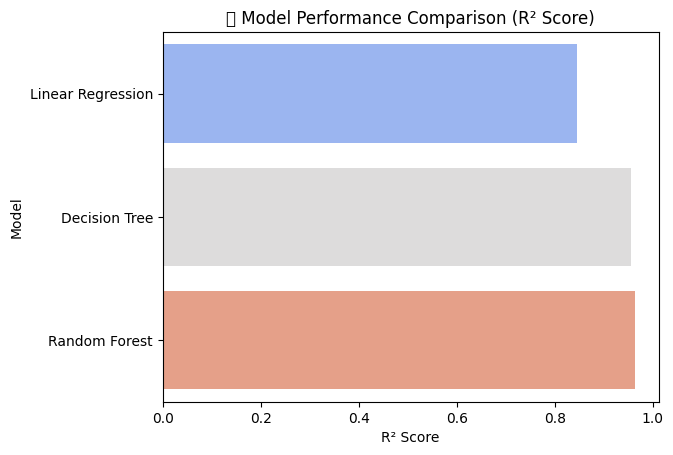

In [20]:
sns.barplot(
    x="R² Score",
    y="Model",
    data=results_df,
    palette="coolwarm"
)
plt.title("🏆 Model Performance Comparison (R² Score)")
plt.show()



/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


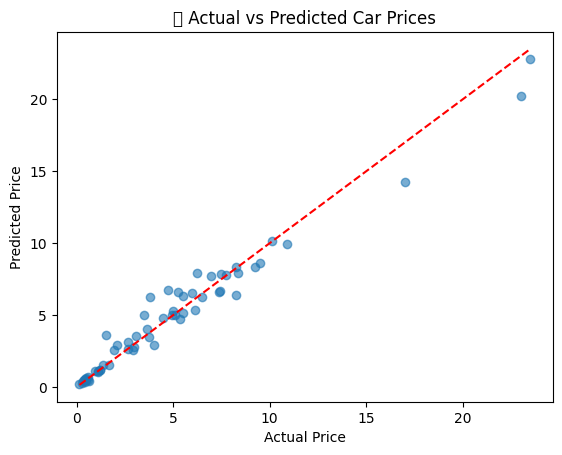

In [21]:
best_pred = model.predict(X_test)

plt.scatter(y_test, best_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("🎯 Actual vs Predicted Car Prices")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


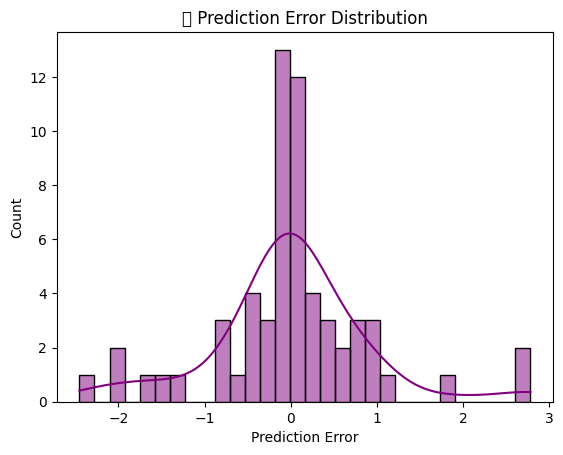

In [22]:
errors = y_test - best_pred

sns.histplot(errors, bins=30, kde=True, color="purple")
plt.title("📊 Prediction Error Distribution")
plt.xlabel("Prediction Error")
plt.show()


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


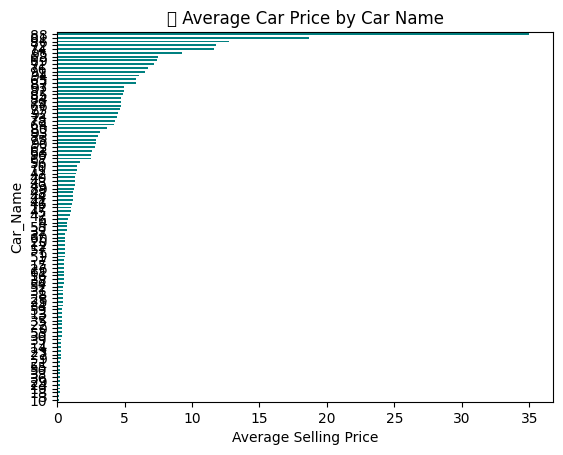

In [24]:
brand_price = car.groupby("Car_Name")["Selling_Price"].mean().sort_values()

brand_price.plot(kind="barh", color="teal")
plt.title("🏷️ Average Car Price by Car Name")
plt.xlabel("Average Selling Price")
plt.show()

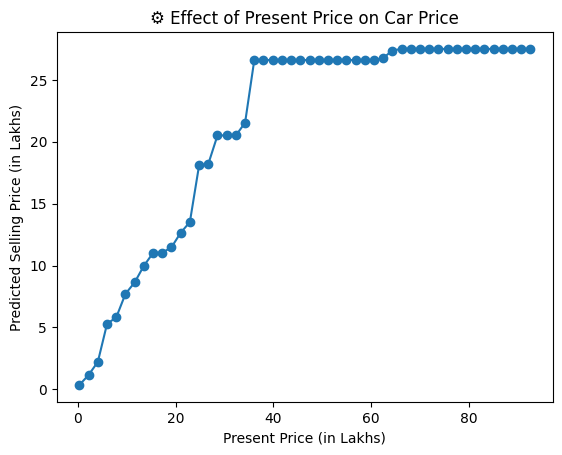

In [28]:
sample = X_test.iloc[[0]].copy()

present_price_range = np.linspace(X['Present_Price'].min(), X['Present_Price'].max(), 50)
prices = []

for price_val in present_price_range:
    temp_sample = sample.copy()
    temp_sample.loc[:, "Present_Price"] = price_val
    prices.append(model.predict(temp_sample)[0])

plt.plot(present_price_range, prices, marker="o")
plt.title("⚙️ Effect of Present Price on Car Price")
plt.xlabel("Present Price (in Lakhs)")
plt.ylabel("Predicted Selling Price (in Lakhs)")
plt.show()